# 9-3 LSTM과 GRU 셀

In [1]:
from tensorflow.keras.datasets import imdb
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target) = imdb.load_data(num_words=500)
train_input, val_input, train_target, val_target = train_test_split(train_input, train_target, test_size=0.2, random_state=42)

17464789/17464789 [==============================] - 1s 0us/step


In [3]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

train_seq = pad_sequences(train_input, maxlen=100)
val_seq = pad_sequences(val_input, maxlen=100)

In [4]:
from tensorflow import keras

model = keras.Sequential()
model.add(keras.layers.Embedding(500, 16, input_length=100))
model.add(keras.layers.LSTM(8))
model.add(keras.layers.Dense(1, activation='sigmoid'))

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 16)           8000      
                                                                 
 lstm (LSTM)                 (None, 8)                 800       
                                                                 
 dense (Dense)               (None, 1)                 9         
                                                                 
Total params: 8,809
Trainable params: 8,809
Non-trainable params: 0
_________________________________________________________________


In [6]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-lstm-model.h5', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model.fit(train_seq, train_target, epochs=100, batch_size=64, validation_data=(val_seq, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 20s 37ms/step - loss: 0.6926 - accuracy: 0.5303 - val_loss: 0.6922 - val_accuracy: 0.5356
Epoch 2/100
313/313 [==============================] - 9s 27ms/step - loss: 0.6915 - accuracy: 0.5629 - val_loss: 0.6910 - val_accuracy: 0.5662
Epoch 3/100
313/313 [==============================] - 6s 19ms/step - loss: 0.6898 - accuracy: 0.5800 - val_loss: 0.6887 - val_accuracy: 0.5888
Epoch 4/100
313/313 [==============================] - 5s 17ms/step - loss: 0.6866 - accuracy: 0.6004 - val_loss: 0.6848 - val_accuracy: 0.6010
Epoch 5/100
313/313 [==============================] - 4s 14ms/step - loss: 0.6808 - accuracy: 0.6166 - val_loss: 0.6772 - val_accuracy: 0.6134
Epoch 6/100
313/313 [==============================] - 5s 16ms/step - loss: 0.6696 - accuracy: 0.6352 - val_loss: 0.6621 - val_accuracy: 0.6450
Epoch 7/100
313/313 [==============================] - 4s 13ms/step - loss: 0.6447 - accuracy: 0.6668 - val_loss: 0.6254 - val_accuracy

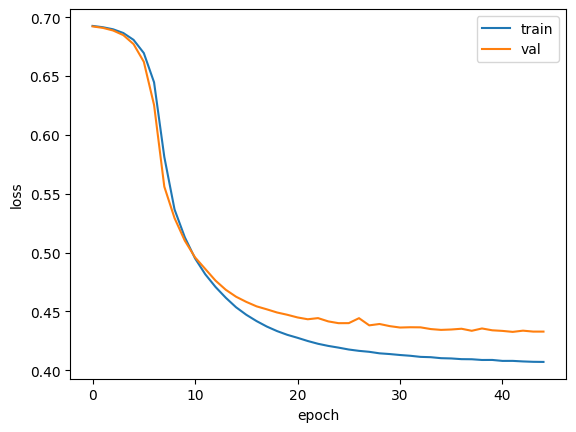

In [7]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [8]:
model2 = keras.Sequential()
model2.add(keras.layers.Embedding(500, 16, input_length=100))
model2.add(keras.layers.LSTM(8, dropout=0.3))
model2.add(keras.layers.Dense(1, activation='sigmoid'))

In [9]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model2.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-dropout-model.h5', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model2.fit(train_seq, train_target, epochs=100, batch_size=64, validation_data=(val_seq, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 10s 20ms/step - loss: 0.6927 - accuracy: 0.5272 - val_loss: 0.6921 - val_accuracy: 0.5806
Epoch 2/100
313/313 [==============================] - 3s 9ms/step - loss: 0.6913 - accuracy: 0.5787 - val_loss: 0.6903 - val_accuracy: 0.6202
Epoch 3/100
313/313 [==============================] - 4s 12ms/step - loss: 0.6887 - accuracy: 0.6136 - val_loss: 0.6865 - val_accuracy: 0.6420
Epoch 4/100
313/313 [==============================] - 3s 8ms/step - loss: 0.6818 - accuracy: 0.6429 - val_loss: 0.6748 - val_accuracy: 0.6630
Epoch 5/100
313/313 [==============================] - 3s 9ms/step - loss: 0.6479 - accuracy: 0.6816 - val_loss: 0.6168 - val_accuracy: 0.7064
Epoch 6/100
313/313 [==============================] - 3s 8ms/step - loss: 0.6016 - accuracy: 0.7120 - val_loss: 0.5934 - val_accuracy: 0.7148
Epoch 7/100
313/313 [==============================] - 4s 12ms/step - loss: 0.5796 - accuracy: 0.7308 - val_loss: 0.5715 - val_accuracy: 0.

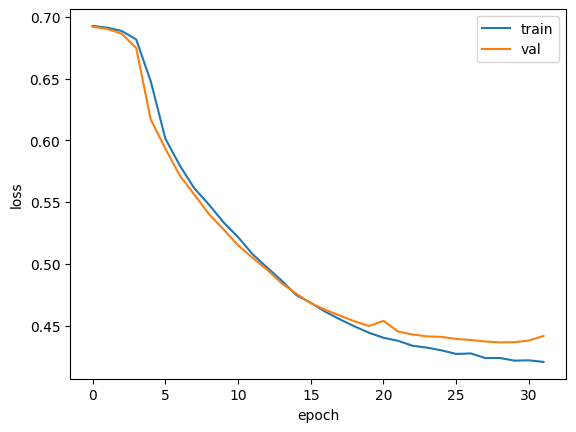

In [10]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [11]:
model3 = keras.Sequential()
model3.add(keras.layers.Embedding(500, 16, input_length=100))
model3.add(keras.layers.LSTM(8, dropout=0.3, return_sequences=True))
model3.add(keras.layers.LSTM(8, dropout=0.3))
model3.add(keras.layers.Dense(1, activation='sigmoid'))

In [12]:
model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 100, 16)           8000      
                                                                 
 lstm_2 (LSTM)               (None, 100, 8)            800       
                                                                 
 lstm_3 (LSTM)               (None, 8)                 544       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 9,353
Trainable params: 9,353
Non-trainable params: 0
_________________________________________________________________


In [24]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model3.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-2rnn-model.h5', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)

history = model3.fit(train_seq, train_target, epochs=100, batch_size=64, validation_data=(val_seq, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 13s 28ms/step - loss: 0.4271 - accuracy: 0.8044 - val_loss: 0.4411 - val_accuracy: 0.7978
Epoch 2/100
313/313 [==============================] - 4s 12ms/step - loss: 0.4261 - accuracy: 0.8038 - val_loss: 0.4373 - val_accuracy: 0.7946
Epoch 3/100
313/313 [==============================] - 5s 15ms/step - loss: 0.4241 - accuracy: 0.8067 - val_loss: 0.4373 - val_accuracy: 0.7966
Epoch 4/100
313/313 [==============================] - 4s 13ms/step - loss: 0.4264 - accuracy: 0.8061 - val_loss: 0.4373 - val_accuracy: 0.7986
Epoch 5/100
313/313 [==============================] - 4s 11ms/step - loss: 0.4258 - accuracy: 0.8041 - val_loss: 0.4380 - val_accuracy: 0.7992


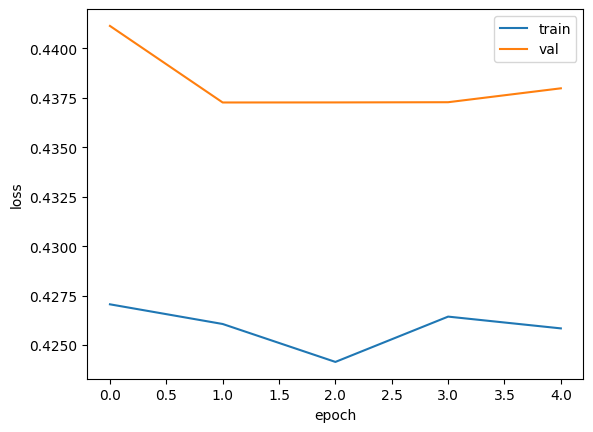

In [25]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [26]:
model4 = keras.Sequential()
model4.add(keras.layers.Embedding(500, 16, input_length=100))
model4.add(keras.layers.GRU(8))
model4.add(keras.layers.Dense(1, activation='sigmoid'))

In [27]:
model4.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 100, 16)           8000      
                                                                 
 gru_1 (GRU)                 (None, 8)                 624       
                                                                 
 dense_4 (Dense)             (None, 1)                 9         
                                                                 
Total params: 8,633
Trainable params: 8,633
Non-trainable params: 0
_________________________________________________________________


In [30]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model4.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-gru-model.h5', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model4.fit(train_seq, train_target, epochs=100, batch_size=64, validation_data=(val_seq, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 10s 27ms/step - loss: 0.6578 - accuracy: 0.6296 - val_loss: 0.6564 - val_accuracy: 0.6200
Epoch 2/100
313/313 [==============================] - 3s 8ms/step - loss: 0.6429 - accuracy: 0.6434 - val_loss: 0.6405 - val_accuracy: 0.6310
Epoch 3/100
313/313 [==============================] - 3s 9ms/step - loss: 0.6208 - accuracy: 0.6651 - val_loss: 0.6147 - val_accuracy: 0.6630
Epoch 4/100
313/313 [==============================] - 3s 10ms/step - loss: 0.5839 - accuracy: 0.6967 - val_loss: 0.5675 - val_accuracy: 0.7128
Epoch 5/100
313/313 [==============================] - 4s 12ms/step - loss: 0.5243 - accuracy: 0.7411 - val_loss: 0.5146 - val_accuracy: 0.7494
Epoch 6/100
313/313 [==============================] - 3s 8ms/step - loss: 0.4939 - accuracy: 0.7630 - val_loss: 0.4977 - val_accuracy: 0.7586
Epoch 7/100
313/313 [==============================] - 3s 8ms/step - loss: 0.4784 - accuracy: 0.7739 - val_loss: 0.4854 - val_accuracy: 0.

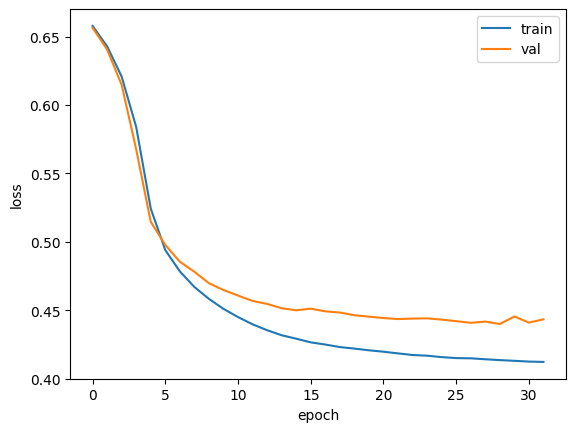

In [31]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [32]:
test_seq = pad_sequences(test_input, maxlen=100)
rnn_model = keras.models.load_model('best-2rnn-model.h5')
rnn_model.evaluate(test_seq, test_target)

782/782 [==============================] - 5s 6ms/step - loss: 0.4323 - accuracy: 0.7982


[0.4323085844516754, 0.7982400059700012]